# HH Exploratory Data Analysis

## Objective

- What are the overall sales trend?
- Revenue generated from each course
- What are top 3 courses by sales?
- What are the number of course orders handled by each counsellor?
- How does the mean revenue collected per month vary with time?

#### IMPORTING REQUIRED LIBRARIES 

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LinearRegression

#### IMPORTING THE DATASET

In [2]:
ds = pd.read_excel('cleaned_data.xlsx')
df = ds.sample(frac=1)
pd.options.display.float_format = '{:.2f}'.format

#### DATA AUDIT

In [3]:
df.head()

,Unnamed: 0,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending,Unnamed: 7,Unnamed: 8,Unnamed: 9
5763,6216,2021-05-01,Ankit,SSGB,17500.00,17500.00,0,NaN,NaN,NaN
5553,6004,2021-04-01,Vineeta,SSGB,13175.00,13175.00,0,NaN,NaN,NaN
3018,3045,2020-07-01,Pooja,GST,4590.19,4590.19,0,NaN,NaN,NaN
263,267,2020-07-01,MM,CDCW,17000.00,17000.00,0,NaN,NaN,NaN
1265,1286,2021-01-01,SS,CDCW,12000.00,12000.00,0,NaN,NaN,NaN


In [4]:
df.tail()

,Unnamed: 0,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending,Unnamed: 7,Unnamed: 8,Unnamed: 9
3465,3875,2020-06-01,Ruby,SSBB,22000.00,22000.00,0,NaN,NaN,NaN
3388,3798,2020-04-01,Ruby,GST,15000.00,15000.00,0,NaN,NaN,NaN
1235,1256,2021-01-01,CD,CDCW,2000.00,2000.00,0,NaN,NaN,NaN
6171,6642,2021-02-01,Vineeta,PMP,11825.00,11825.00,0,NaN,NaN,NaN
4311,4741,2021-06-01,Sonam,SSBB,23600.00,23600.00,0,NaN,NaN,NaN


In [5]:
df.shape

(6360, 10)

In [6]:
df.columns

Index(['Unnamed: 0', 'Month', 'Counsellor Name', 'Course Name', 'Fees Total',
       'Fees Received', 'Fees Pending', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6360 entries, 5763 to 4311
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       6360 non-null   int64         
 1   Month            6360 non-null   datetime64[ns]
 2   Counsellor Name  6360 non-null   object        
 3   Course Name      6360 non-null   object        
 4   Fees Total       6360 non-null   float64       
 5   Fees Received    6360 non-null   float64       
 6   Fees Pending     6360 non-null   object        
 7   Unnamed: 7       0 non-null      float64       
 8   Unnamed: 8       0 non-null      float64       
 9   Unnamed: 9       0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 546.6+ KB


In [8]:
df.drop('Unnamed: 7', axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6360 entries, 5763 to 4311
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       6360 non-null   int64         
 1   Month            6360 non-null   datetime64[ns]
 2   Counsellor Name  6360 non-null   object        
 3   Course Name      6360 non-null   object        
 4   Fees Total       6360 non-null   float64       
 5   Fees Received    6360 non-null   float64       
 6   Fees Pending     6360 non-null   object        
 7   Unnamed: 8       0 non-null      float64       
 8   Unnamed: 9       0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 496.9+ KB


In [9]:
df.drop(['Unnamed: 8','Unnamed: 9'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6360 entries, 5763 to 4311
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       6360 non-null   int64         
 1   Month            6360 non-null   datetime64[ns]
 2   Counsellor Name  6360 non-null   object        
 3   Course Name      6360 non-null   object        
 4   Fees Total       6360 non-null   float64       
 5   Fees Received    6360 non-null   float64       
 6   Fees Pending     6360 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 397.5+ KB


In [10]:
# Checking missing values
df.isnull().sum()

Unnamed: 0         0
Month              0
Counsellor Name    0
Course Name        0
Fees Total         0
Fees Received      0
Fees Pending       0
dtype: int64

In [11]:
# Getting descriptive statistics summary
df.describe()

,Unnamed: 0,Fees Total,Fees Received
count,6360.00,6360.00,6360.00
mean,3395.56,12746.30,1559008.97
std,2025.87,8296.17,123308464.27
min,1.00,0.00,0.00
25%,1612.75,7700.04,7600.00
50%,3206.50,11750.00,11875.00
75%,5203.25,15000.00,15000.00
max,6839.00,89000.00,9833814498.00


### EXPLORATORY DATA ANALYSIS

- <H4> WHAT IS THE OVERALL SALES TREND?

In [12]:
df['Month'].min()

Timestamp('2020-04-01 00:00:00')

In [13]:
df['Month'].max()

Timestamp('2021-07-01 00:00:00')

In [14]:
df['month_year'] = df['Month'].apply(lambda x: x.strftime('%Y-%m'))


In [15]:
# Grouping month year
df_trend = df.groupby('month_year').sum()['Fees Total'].reset_index()
df_trend

,month_year,Fees Total
0,2020-04,3618720.00
1,2020-05,2080410.00
2,2020-06,1170850.00
3,2020-07,7004012.89
4,2020-08,4585163.11
5,2020-09,3118683.92
6,2020-10,3991449.00
7,2020-11,3963611.00
8,2020-12,5820778.73
9,2021-01,4979998.00


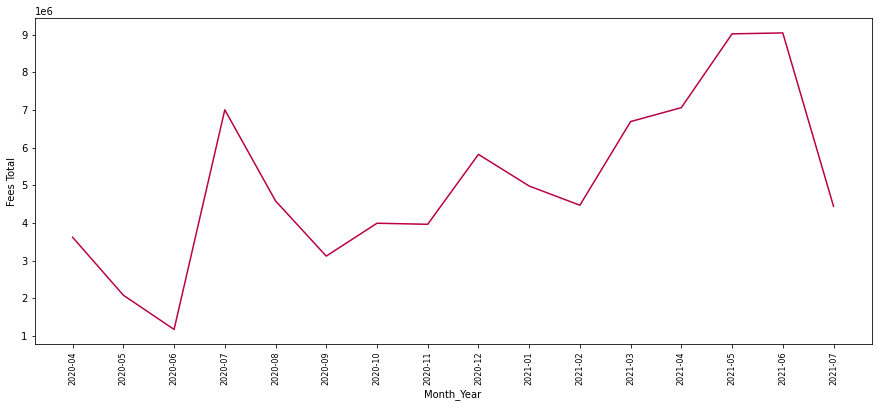

In [16]:
# Setting the figure size
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['Fees Total'], color='#b80045')
plt.xlabel('Month_Year', fontsize=10)
plt.ylabel('Fees Total', fontsize=10)
plt.xticks(rotation='vertical', size=8)
plt.show()

- <H4> WHAT ARE THE SALES OF EACH COURSE?

In [17]:
#Sales of each course
course_count = pd.DataFrame(df.groupby('Course Name').count()['Fees Total'])
course_count

,Fees Total
Course Name,
Analytics,53
CDCW,2590
GST,834
PMP,268
SSBB,1026
SSGB,1589


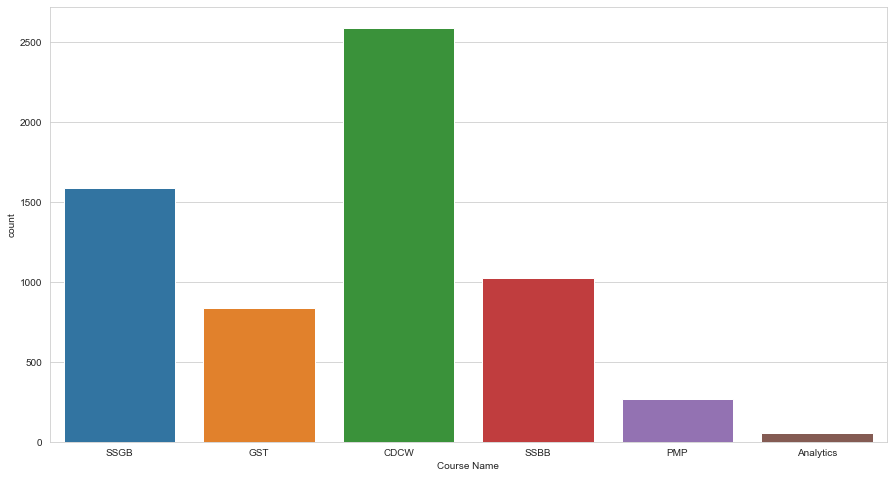

In [18]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.countplot(x=df['Course Name'])
plt.show()

- <H4> WHAT ARE THE TOP 3 COURSES BY SALES?

In [19]:
course_sales = pd.DataFrame(df.groupby('Course Name').count()['Fees Total'].rename('Count'))

In [20]:
course_sales = course_sales.sort_values('Count', ascending=False)

In [21]:
#Top 3 courses by sales
course_sales[:3]

,Count
Course Name,
CDCW,2590
SSGB,1589
SSBB,1026


- <H4> WHAT IS THE REVENUE GENERATED FROM EACH COURSE?

In [22]:
course_rev = pd.DataFrame(df.groupby('Course Name').sum()['Fees Total'].rename('Revenue Generated'))
course_rev

,Revenue Generated
Course Name,
Analytics,510547.65
CDCW,30087032.40
GST,4854866.89
PMP,3104577.00
SSBB,24054030.52
SSGB,18455384.00


- <H5> Bar Graph

<AxesSubplot:xlabel='Course Name', ylabel='Revenue collected'>

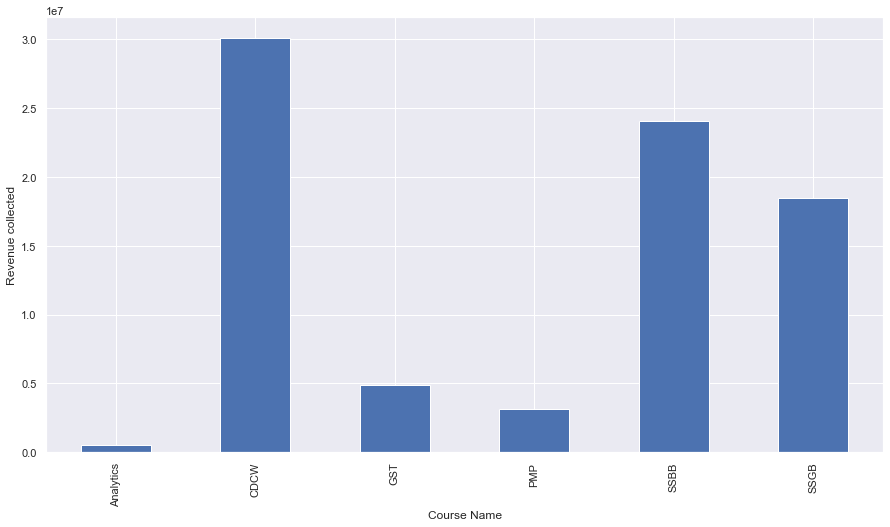

In [23]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
df.groupby('Course Name').sum()['Fees Total'].rename('Revenue Generated').plot(kind="bar", ylabel="Revenue collected")


- <H5> Pie Chart

<AxesSubplot:ylabel='Revenue Generated'>

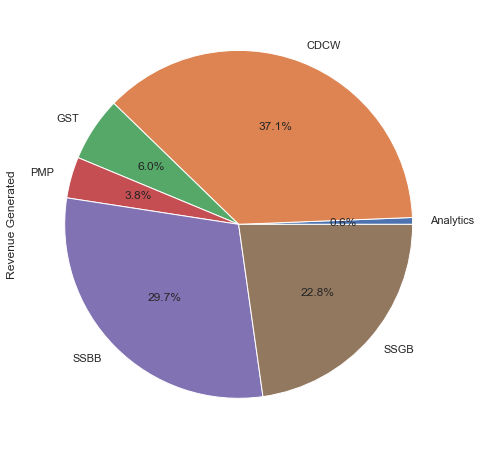

In [24]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
df.groupby('Course Name').sum()['Fees Total'].rename('Revenue Generated').plot(kind="pie",autopct='%1.1f%%')

- <H4> WHAT ARE THE NUMBER OF COURSE ORDERS HANDLED BY EACH COUNSELLOR?

In [25]:
df.groupby('Counsellor Name').count()['Course Name']

Counsellor Name
Abhishek       76
Abhishek C    127
Akansha       139
Ankit         247
Ayushi          3
Bhoomika        9
CD            222
Chandrika      15
Deepak        366
Deepender      17
Deepti         17
Garima         54
Hemlata         9
Honey           7
IJ            329
Iqra           13
KIM             2
Khalid         70
Kim           201
Komal          13
Laiba         206
MANISH          2
MM            338
Manish        659
Manisha       124
Mehjabee       18
Minali          9
NC            237
NK            169
Namarta        17
Namrata        27
Naveen        205
Neelam          3
Nimra         110
Pankaj         13
Pooja         490
Priyanka      140
Ruby          127
SK            164
SS            324
Sahiba          5
Sakshi         26
Samreen       148
Simran         78
Sonali          7
Sonam          74
Sunny          17
Suyal          48
Tarun         238
Ujjal           2
VU              2
Vidushi         1
Vikas           1
Vineeta       230
Vipin       

<AxesSubplot:xlabel='Counsellor Name', ylabel='Course count'>

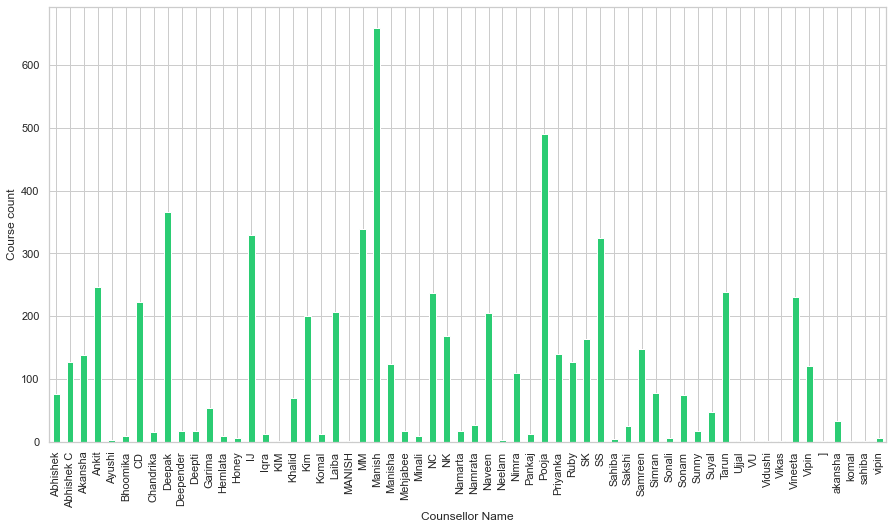

In [26]:
plt.figure(figsize=(15,8))
df.groupby('Counsellor Name').count()['Course Name'].plot(kind="bar", ylabel="Course count", color="#2bcc73")

- <H4> HOW DOES THE MEAN REVENUE COLLECTED PER MONTH VARY WITH TIME?

- <H5> Line Plot

Month
2020-04-01    9092.26
2020-05-01    9631.53
2020-06-01   12589.78
2020-07-01    6747.60
2020-08-01   12325.71
2020-09-01   12134.96
2020-10-01   12357.43
2020-11-01   12543.07
2020-12-01   14736.15
2021-01-01   15809.52
2021-02-01   13304.01
2021-03-01   14579.68
2021-04-01   16013.40
2021-05-01   15422.14
2021-06-01   17395.89
2021-07-01   15002.77
Name: Fees Total, dtype: float64


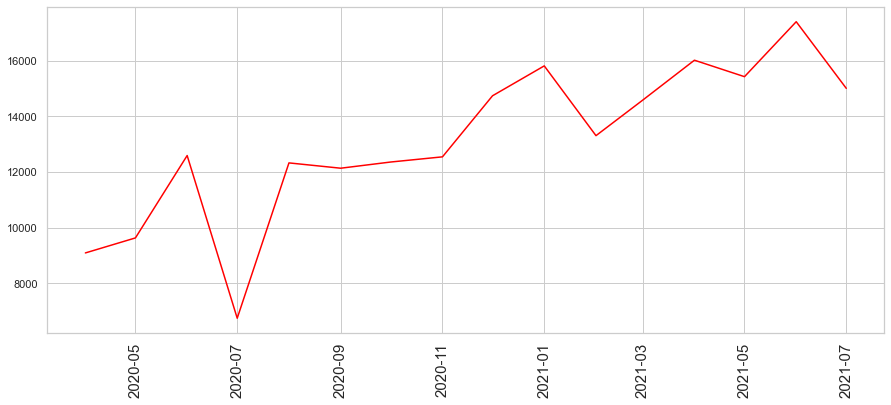

In [27]:
course_ran = df.groupby('Month', as_index=True).mean()['Fees Total']
print(course_ran)
date = df['Month'].map(dt.datetime.toordinal)
plt.figure(figsize=(15,6))
plt.plot(course_ran, color="red")
plt.xticks(rotation='vertical', size=15)
plt.show()

- <H5> Scatter Plot

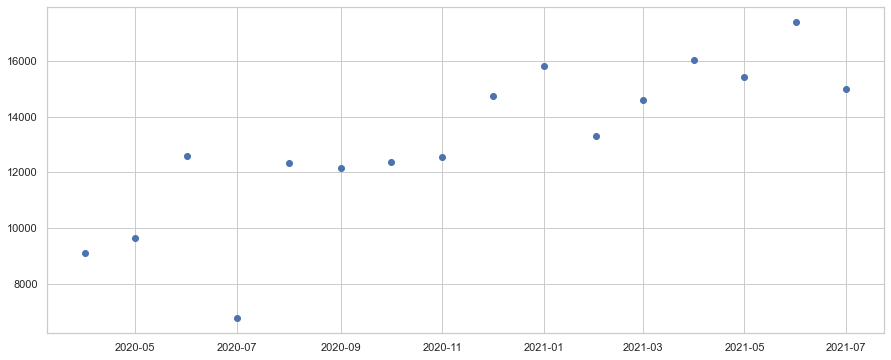

In [28]:
plt.figure(figsize=(15,6))
a = pd.DataFrame(df.groupby('Month', as_index=True).mean()['Fees Total']).values
b = df['Month'].unique()
c = np.sort(b)
plt.scatter(c,a)

- <H5> Linear Regression Model

In [29]:
p = df['Month'].map(dt.datetime.toordinal).unique()
q= np.sort(p)
q = q.reshape(-1,1)
q.shape

(16, 1)

In [30]:
model = LinearRegression()
model.fit(q,a)

LinearRegression()

In [31]:
# Getting predicted monthly mean revenues in the form of an array
a_pred = model.predict(q)
a_pred

array([[ 9365.85492169],
       [ 9856.95378934],
       [10364.42261925],
       [10855.5214869 ],
       [11362.99031681],
       [11870.45914672],
       [12361.55801437],
       [12869.02684428],
       [13360.12571193],
       [13867.59454184],
       [14375.06337175],
       [14833.42231489],
       [15340.8911448 ],
       [15831.99001245],
       [16339.45884236],
       [16830.55771001]])

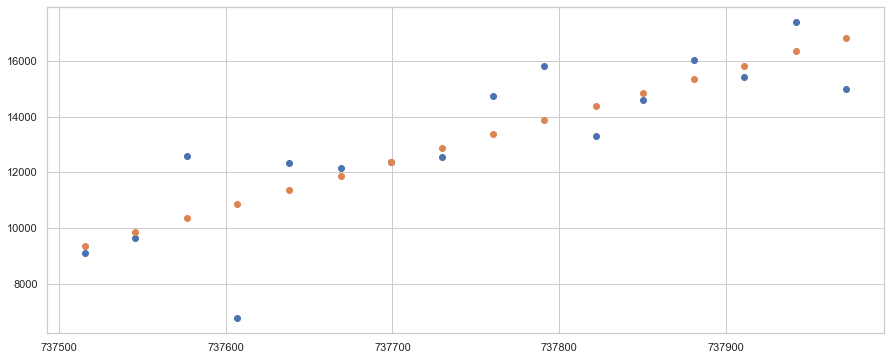

In [32]:
plt.figure(figsize=(15,6))
plt.scatter(q,a)
plt.scatter(q,a_pred)

In [33]:
model.score(q,a)

0.7065517159854118

###### The linear regression model has an accuracy of approximately 71%

In [34]:
# Viewing the ".map(dt.datetime.toordinal)" equivalent of "Month" column of dataset
q

array([[737516],
       [737546],
       [737577],
       [737607],
       [737638],
       [737669],
       [737699],
       [737730],
       [737760],
       [737791],
       [737822],
       [737850],
       [737881],
       [737911],
       [737942],
       [737972]], dtype=int64)

In [35]:
# Predicting mean revenues for upcoming months
x_pred = np.array([737975,738000]).reshape(-1,1)
y_pred = model.predict(x_pred)
y_pred

array([[16879.66759677],
       [17288.91665315]])

In [44]:
df.groupby('Course Name').sum()['Fees Pending']

KeyError: 'Fees Pending'